In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d
from PIL import Image, ImageFilter

In [71]:
def binarize(image_to_transform, threshold):

    output_image=image_to_transform.convert("L")

    for x in range(output_image.width):
        for y in range(output_image.height):

            if output_image.getpixel((x,y)) < threshold: #note that the first parameter is actually a tuple object

                output_image.putpixel( (x,y), 0 )
            else:
 
                output_image.putpixel( (x,y), 255 )

    return output_image
 
def scale_image(k):
    r_scaled = rescale(my_pic1[:,:,0], k)
    g_scaled = rescale(my_pic1[:,:,1], k)
    b_scaled = rescale(my_pic1[:,:,2], k)
    return np.stack([r_scaled, g_scaled, b_scaled], axis=2)
    
    
def get_gauss_kernel(size = 3, sigma = 1):
    center = (int)(size / 2)
    kernel = np.zeros((size, size))
    
    for i in range(size):
       for j in range(size):
          diff = np.sqrt((i-center)**2+(j-center)**2)
          kernel[i,j] = np.exp(-(diff**2)/(2*sigma**2))
    return kernel / np.sum(kernel)

def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

def do_convolution_kernel()

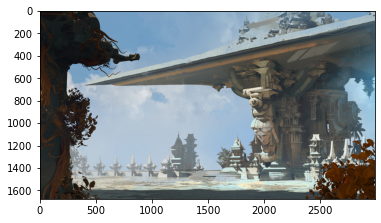

In [103]:
image = Image.open(r"pic1.jpg")
#image.show()

img = imread('pic1.jpg')
plt.imshow(img); 

processing...


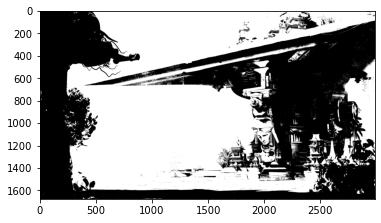

In [106]:
gaus = get_gauss_kernel(5, 3)

print('processing...')
conv_img = binarize(image, 100)
conv_img.save('pic1_gaus.jpg')
#conv_img.show()

img = imread('pic1_gaus.jpg')
plt.imshow(img, cmap='gray'); 
